# Trabajo Práctico 1: Análisis Exploratorio de Datos

En este trabajo se va a utilizar un dataset de beisbol con el que más adelante se va a tratar de predecir si una jugada es home run o no. Pero para predecir lo anterior, primero se debe realizar el análisis de los datos del dataset, que es el objetivo de este TP.

## 1. Listado de variables y selección

### Detalle de variables

                            Nombre                                             Tipo

    - bip_id: identificador único de la pelota en juego                     No utilizada
    - game_date: fecha del juego. Formato (YYYY-MM-DD)                      Entrada (?)
    - home_team: abreviación del equipo local                               Entrada
    - away_team: abreviación del equipo visitante                           Entrada
    - batter_team: abreviación del equipo del bateador                      Entrada
    - batter_name: nombre del bateador                                      Entrada
- pitcher_name: nombre del lanzador                                     Entrada
- batter_id: identificador único del bateador                           No utilizada
- pitcher_id: identificador único del lanzador                          No utilizada                             
- is_batter_lefty: codificaciń binaria de bateadores zurdos             Entrada
- is_pitcher_lefty: codificación binaria de lanzadores zurdos           Entrada
- bb_type: clasificación del tipo de bola bateada                       Entrada
- bearing: clasificación de la dirección horizontal de la pelota        Entrada (?)
- pitch_name: nombre del tipo de lanzamiento                            Entrada
- park: identificador único del estadio                                 No utilizada
- inning: número de entradas dentro del juego                           Entrada
- outs_when_up: número actual de outs                                   Entrada                          
- balls: número actual de bolas                                         Entrada
- strikes: número actual de strikes                                     Entrada
- plate_x: posición de la bola con respecto a la placa central          Entrada (?)
- plate_z: posición de la pelota con respecto al plato de home          Entrada (?)
- pitch_mph: velocidad de la pelota lanzada                             Entrada
- launch_speed: velocidad a la que la pelota del bate                   Entrada
- launch_angle: angulo vertical de la pelota dejando el bate            Entrada
- is_home_run: es home run                                              Salida
- NAME: nombre del estadio                                              Entrada
- Cover: indica si el estadio es abierto en la parte superior           Entrada
- LF_Dim: distancia a la pared del jardin izquierdo                     Entrada
- CF_Dim: distancia a la pared del campo central                        Entrada
- RF_Dim: distancia a la pared del jardin derecho                       Entrada
- LF_W: altura de la pared del jardin izquierdo                         Entrada
- CF_W: altura de la pared del campo central                            Entrada
- RF_W: altura de la pared del jardin derecho                           Entrada

#### Aclaraciones

    game_date: usa un formato (YYYY/MM/DD)
    is_batter_lefty: dos valores posibles:
        0: No
        1: Si
    is_pitcher_lefty: tiene dos valores posibles
        0: No
        1: Si
    bearing: tiene tres posibles valores
        left: izquierda
        center: centro
        rigth: derecha
    plate_x: se indica con signo "-" si esta a la izquierda y con signo "+" si es hacia la derecha. Se mide en pies
    plate_z: se mide en pies
    pitch_mph: se mide en millas por hora
    launch_speed: se mide en millas por hora
    launch_angle: se expresan los grados relativos a una horizontal
    Cover: tiene tres valores posibles.
        Dome: Cúpula,
        Outdoor: Exterior,
        Roof: Techo
    LF_Dim: Se mide en pies
    CF_Dim: Se mide en pies
    RF_Dim: Se mide en pies
    LF_W: Se mide en pies
    CF_W: Se mide en pies
    RF_W: Se mide en pies
    Se va a trabajar con los archivos train y park_dimensions. Los mismos se van a unir mediante la variable "park"

### Detalle de variable de salida

La variable de salida puede tener dos valores:

    0: No es home run
    1: Es home run

### Variables no utilizadas

- bip_id: No se usa una variable porque dicha información no es relevante para ser usada en el modelo y debido a que es un id que nunca se repite
- batter_id: No se usa porque se puede utilizar la variable nombre en su lugar, lo que sería más práctico porque brinda más información
- pitcher_id: No se usa porque se puede utilizar la variable nombre, lo que sería más práctico porqu brinda más información
- park: No se usa porque dicha información no representa mucho y en consecuencia se puede utilizar en su lugar el nombre del estadio. Hay que aclarar que dicha variable la vamos a usar para hacer un merge de los distintos archivos



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
entrenamiento = pd.read_csv('./train.csv')
estadio = pd.read_csv('./park_dimensions.csv')

In [3]:
completa=entrenamiento.merge(estadio, on="park", how="left")

In [4]:
completa.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,launch_angle,is_home_run,NAME,Cover,LF_Dim,CF_Dim,RF_Dim,LF_W,CF_W,RF_W
0,1,2020-08-26,ARI,COL,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,9.0,0,Chase Field,Roof,328,407,335,8,25,8
1,2,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,18.0,0,Coors Field,Outdoor,347,415,350,13,8,16
2,3,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,49.0,0,Coors Field,Outdoor,347,415,350,13,8,16
3,4,2020-08-26,ARI,COL,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,54.0,0,Chase Field,Roof,328,407,335,8,25,8
4,5,2020-08-10,COL,ARI,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,6.0,0,Coors Field,Outdoor,347,415,350,13,8,16


In [5]:
completa.NAME.head(9)

0    Chase Field
1    Coors Field
2    Coors Field
3    Chase Field
4    Coors Field
5    Coors Field
6    Coors Field
7    Chase Field
8    Chase Field
Name: NAME, dtype: object

In [23]:
completa = completa.drop(['park','bip_id','batter_id','pitcher_id'],axis=1)
completa.describe()

,is_batter_lefty,is_pitcher_lefty,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run,LF_Dim,CF_Dim,RF_Dim,LF_W,CF_W,RF_W
count,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,34439.000000,34459.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000
mean,0.421071,0.273419,4.830097,0.960860,1.124124,1.107884,-0.005890,2.323522,88.860602,88.038189,12.477263,0.052915,331.438327,402.929612,328.093591,10.190468,9.410778,10.884958
std,0.493736,0.445719,2.523844,0.818038,1.017073,0.808433,0.542757,0.571431,5.924192,14.791351,28.890217,0.223866,9.753315,5.660943,10.289198,6.497164,3.737091,5.569257
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.060000,-0.140000,70.000000,7.500000,-89.000000,0.000000,310.000000,390.000000,302.000000,4.000000,6.000000,3.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-0.390000,1.930000,84.700000,79.700000,-5.000000,0.000000,328.000000,400.000000,325.000000,7.000000,8.000000,8.000000
50%,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,-0.010000,2.310000,89.700000,90.900000,13.000000,0.000000,330.000000,400.000000,328.000000,8.000000,8.000000,8.000000
75%,1.000000,1.000000,7.000000,2.000000,2.000000,2.000000,0.380000,2.720000,93.600000,99.000000,31.000000,0.000000,336.000000,407.000000,335.000000,11.000000,9.000000,14.000000
max,1.000000,1.000000,13.000000,2.000000,3.000000,2.000000,2.200000,4.740000,102.800000,118.400000,90.000000,1.000000,355.000000,420.000000,353.000000,37.000000,25.000000,25.000000


## 2. Análisis detallado de un conjunto de variables

Para la variable de salida, explicar y graficar su balanceo y qué consecuencias va a tener eso a la hora de entrenar y medir el rendimiento de distintos modelos.

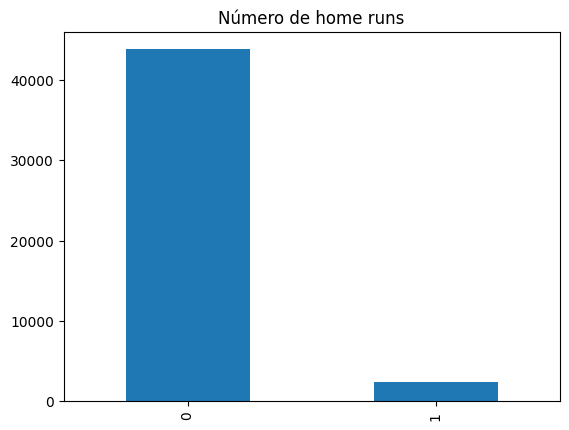

In [10]:
completa.is_home_run.value_counts().plot.bar(title='Número de home runs');

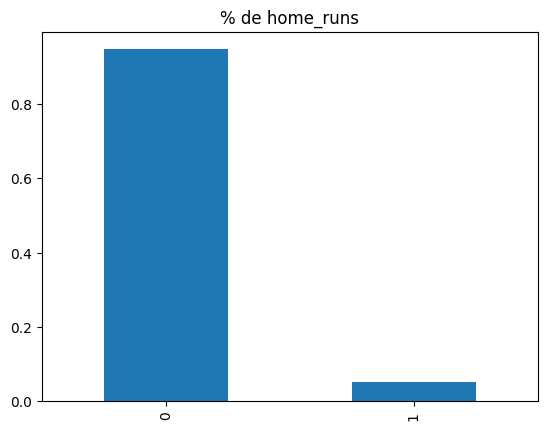

In [25]:
completa.is_home_run.value_counts(normalize=True).plot.bar(title='% de home_runs');

Luego de visualizar el gráfico, podemos ver que los valores de la salida no estan balanciados, ya que se tienen mas de 40000 casos en los que no se tiene home run y solo menos de 5000 donde si se tiene home run. Esta gran diferencia podría traer problemas a la hora de entrenar diferentes modelos, ya que estos se podrían optar por responder siempre por el valor que aparece en la mayoría de los casos y no tratar de predecir.

Para 5 variables de entrada (elegidas o no, pero incluyendo al menos 3 elegidas) graficar y explicar cómo se comportan y cómo afectan a la variable de salida.

Las 5 variables de entrada elegidas para dicho punto son:
- launch speed
- launch angle
- pitch_mph
- strikes
- balls

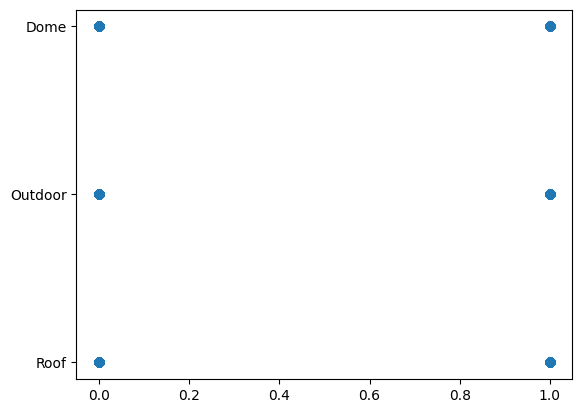

In [78]:
fig, ax = plt.subplots()
ax.scatter(completa.is_home_run, completa.Cover)
plt.show()

Para cada una de las variables de entrada elegidas, explicar si se debería realizar o no alguna transformación para poder utilizarla como entrada de un modelo y por qué.

In [40]:
completa.sample(10)

,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,...,launch_angle,is_home_run,NAME,Cover,LF_Dim,CF_Dim,RF_Dim,LF_W,CF_W,RF_W
24944,2020-08-17,CHC,STL,CHC,"contreras, willson","kim, kwang hyun",0,1,line_drive,right,...,NaN,0,Wrigley Field,Outdoor,355,400,353,16,11,16
7467,2020-08-10,TEX,SEA,SEA,"nola, austin","gibson, kyle",0,0,ground_ball,left,...,NaN,0,Globe Life Park,Outdoor,332,400,325,14,8,8
3846,2020-08-11,HOU,SF,SF,"longoria, evan","bielak, brandon",0,0,line_drive,left,...,16.0,0,Minute Maid Park,Roof,315,409,326,21,9,7
28629,2020-09-22,ATL,MIA,ATL,"duvall, adam","urena, jose",0,0,ground_ball,left,...,-5.0,0,SunTrust Park,Outdoor,335,400,325,6,8,16
11126,2020-08-14,MIA,ATL,ATL,"d'arnaud, travis","lopez, pablo",0,0,line_drive,center,...,NaN,1,Marlins Park,Roof,344,407,335,7,20,7
20192,2020-09-21,KC,STL,KC,"soler, jorge","gallegos, giovanny",0,0,line_drive,left,...,16.0,0,Kauffman Stadium,Outdoor,330,410,330,8,8,8
22599,2020-08-25,SD,SEA,SD,"tatis, fernando","altavilla, dan",0,0,ground_ball,left,...,0.0,0,Petco Park,Outdoor,336,396,322,4,7,10
41863,2020-08-17,NYY,BOS,BOS,"bogaerts, xander","king, mike",0,0,ground_ball,center,...,-28.0,0,New Yankee Stadium,Outdoor,318,408,314,8,8,8
38401,2020-08-12,NYM,WSH,WSH,"kendrick, howie","wilson, justin",0,1,ground_ball,left,...,NaN,0,Citi Field,Outdoor,331,408,330,8,11,8
43334,2020-08-18,MIA,NYM,MIA,"sierra, magneuris","oswalt, corey",1,0,line_drive,center,...,13.0,0,Marlins Park,Roof,344,407,335,7,20,7


Analizar si las variables de entrada seleccionadas presentan valores nulos y/o extremos. En caso de encontrar dichas condiciones, indicar qué tratamiento se podría darle a las mismas y por qué.

In [28]:
completa.isnull().sum()

game_date               0
home_team               0
away_team               0
batter_team             0
batter_name             0
pitcher_name            0
is_batter_lefty         0
is_pitcher_lefty        0
bb_type                 6
bearing                 0
pitch_name              0
inning                  0
outs_when_up            0
balls                   0
strikes                 0
plate_x                 0
plate_z                 0
pitch_mph               0
launch_speed        11805
launch_angle        11785
is_home_run             0
NAME                    0
Cover                   0
LF_Dim                  0
CF_Dim                  0
RF_Dim                  0
LF_W                    0
CF_W                    0
RF_W                    0
dtype: int64

Como se puede ver en la estadistica anterior hay valores nulos en las variables velocidad y angulo de lanzamiento. También bb_type

In [31]:
completa.describe()

,is_batter_lefty,is_pitcher_lefty,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run,LF_Dim,CF_Dim,RF_Dim,LF_W,CF_W,RF_W
count,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,34439.000000,34459.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000
mean,0.421071,0.273419,4.830097,0.960860,1.124124,1.107884,-0.005890,2.323522,88.860602,88.038189,12.477263,0.052915,331.438327,402.929612,328.093591,10.190468,9.410778,10.884958
std,0.493736,0.445719,2.523844,0.818038,1.017073,0.808433,0.542757,0.571431,5.924192,14.791351,28.890217,0.223866,9.753315,5.660943,10.289198,6.497164,3.737091,5.569257
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.060000,-0.140000,70.000000,7.500000,-89.000000,0.000000,310.000000,390.000000,302.000000,4.000000,6.000000,3.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-0.390000,1.930000,84.700000,79.700000,-5.000000,0.000000,328.000000,400.000000,325.000000,7.000000,8.000000,8.000000
50%,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,-0.010000,2.310000,89.700000,90.900000,13.000000,0.000000,330.000000,400.000000,328.000000,8.000000,8.000000,8.000000
75%,1.000000,1.000000,7.000000,2.000000,2.000000,2.000000,0.380000,2.720000,93.600000,99.000000,31.000000,0.000000,336.000000,407.000000,335.000000,11.000000,9.000000,14.000000
max,1.000000,1.000000,13.000000,2.000000,3.000000,2.000000,2.200000,4.740000,102.800000,118.400000,90.000000,1.000000,355.000000,420.000000,353.000000,37.000000,25.000000,25.000000


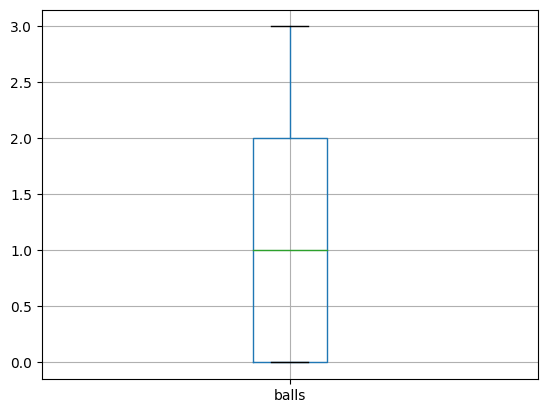

In [56]:
#completa.launch_speed.value_counts(normalize=True).plot.bar(title='% de home_runs');
completa.boxplot('balls');
#full[full.fare.notnull()][["p_class", "fare"]].boxplot(by='p_class', figsize=(8, 6));

Verificar si existen variables altamente correlacionadas con la variable "target". En dicho caso, explicar por qué considera que esto pasa. (hacer gráfico de colores)

/tmp/ipykernel_3755/2573451146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(completa.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


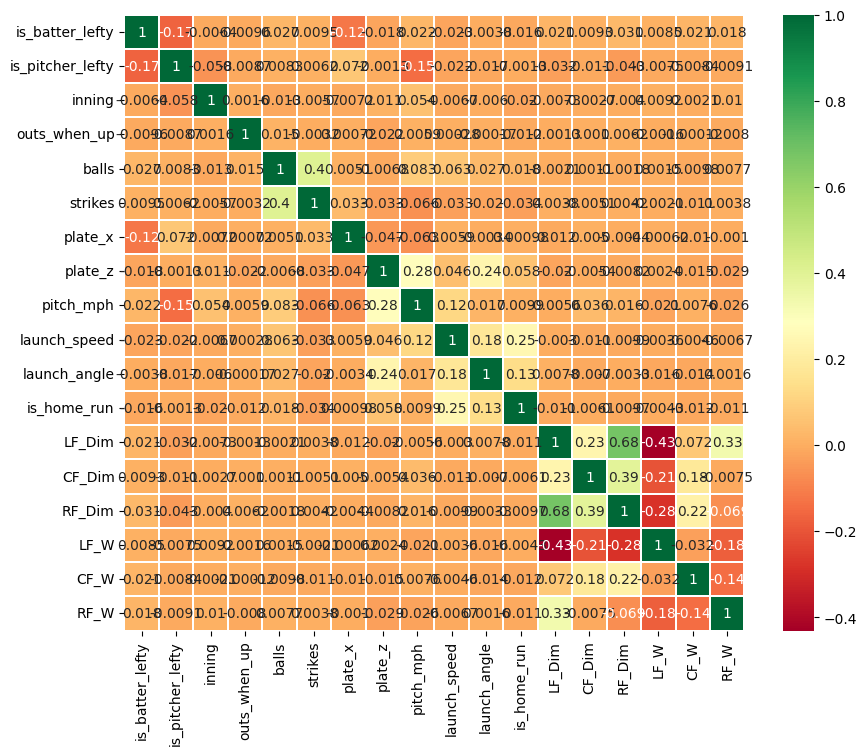

In [57]:
sns.heatmap(completa.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## 3. Hipótesis sobre los datos